# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Regresja liniowa, metoda największego spadku




In [1]:
import numpy as np 
import matplotlib.pyplot as plt


x = np.array([-2.29399323, -1.43363036, -0.52468804, -0.39544295, -0.24097318,
       -0.14898657, -0.0343155 ,  0.19022609,  0.38726758,  0.59190507,
        0.91906829,  1.03690893])

y= np.array([-7.77733551, -4.70740336, -2.41251556,  0.36564371, -1.9492586 ,
       -0.19388007,  0.82003484,  2.6322221 ,  2.26459065,  2.97531505,
        4.8613992 ,  7.20417432])
m = x.shape[0]
# y = 4.2*x + 1.2 + np.random.randn(m)


In [2]:
w, b = 1, 0.1

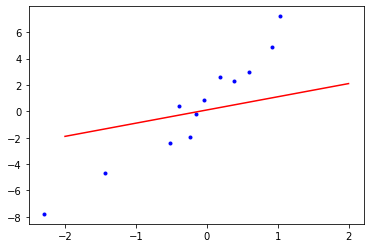

In [3]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,w*xlin+b,'r-')

### Funkcja straty

Funkcją straty będzie suma kwadratów odchyleń przewidywania modelu od rzeczywistej wartości:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2$$

In [6]:
b, w, x.shape, y.shape

(0.1, 1, (12,), (12,))

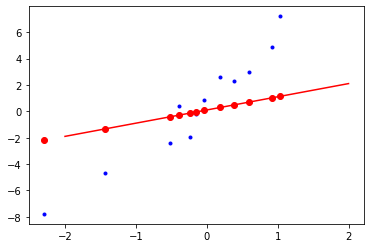

In [7]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,w*xlin+b,'r-')
plt.plot(x, w*x+b, 'ro')

In [4]:
L = lambda w,b: 0.5/m*np.sum( (w*x+b-y)**2 )
L(w,b)

4.843228487160661

In [9]:
L(1, 1)

4.886005439160662

### Zadanie 1

Oblicz pochodne funkcji strat $L(w,b)$ po parametrach $w$ i $b$. 



$$\frac{\partial L}{\partial w} = \frac{\partial  \frac{1}{2m} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2}{\partial w}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w x_i+b - y_i)  x_i
$$

$$\frac{\partial L}{\partial b} = \frac{\partial  \frac{1}{2} \sum_{i=0}^{m-1} (w x_i+b - y_i)^2}{\partial b}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (w x_i+b - y_i)  
$$

w punkcie $w = 1$, $b = 0.1$.

 - *Uwaga 1:* Oznaczenie `dw`  użyte w kodzie poniżej często się stosuje jako skrót $\frac{\partial L}{\partial w}$. Podobnie  jest z `db`.
 - *Uwaga 2:* Pochodne określa się potocznie mianem "gradientów", ponieważ wagi $w$ w ogólnym przypadku są wektorem.


In [10]:
dw = 1/m * np.sum((w * x + b - y) * x)
db = 1/m * np.sum(w * x + b - y)

In [11]:
np.testing.assert_approx_equal(-2.5971538397574383, dw,significant=6)
np.testing.assert_approx_equal(-0.4024700533333332 ,db,significant=6)

### Zadanie 2

**Sprawdzanie gradientów**

Oblicz pochodne korzystając ze wzoru na iloraz różnicowy:

$$\frac{df}{dx} \simeq \frac{f(x+h)-f(x)}{h}$$ 

Przyjmij $h=0.001$ (jest to niezbędne, aby wyszły testy).

In [12]:
w, b

(1, 0.1)

In [17]:
h = 0.001
dw_num = (L(w+h, b) - L(w,b))/h
db_num = (L(w, b+h) - L(w,b))/h

dw_num, dw

(-2.5967252065637325, -2.5971538397574383)

In [18]:
np.testing.assert_approx_equal( -2.5967252065637325,dw_num,significant=6)
np.testing.assert_approx_equal(-0.4019700533337556 ,db_num,significant=6)

### Zadanie 3

Zaimplementuj algorytm najmniejszego spadku. W tym celu startując z $w=1$ i $b=0.1$, wykonaj:

1. Oblicz gradienty (pochodne) w punktcie $w,b$ korzystając z implementacji `dw` i `db`.

1. $w \to w - \alpha \frac{\partial L}{\partial w}$
2. $b \to b - \alpha \frac{\partial L}{\partial b}$

Wykonaj 100 takich  kroków z $\alpha=0.1$. Na wykresie zobaczysz efekt takiego działania.




In [19]:
alpha = 0.1
w, b = 1, 0.1

for i in range(100):
    # wzory na pochodne:
    dw = 1/m * np.sum((w * x + b - y) * x)
    db = 1/m * np.sum(w * x + b - y)
    
    w = w - alpha * dw
    b = b - alpha * db
    
print(L(w,b),w,b,dw,db)

0.49688099293683835 4.2030070016377605 1.0215427138165052 -0.0008839348807061682 -0.0005649979677355144


In [20]:
np.testing.assert_approx_equal( 4.2030, w, significant=3)
np.testing.assert_approx_equal( 1.0215, b, significant=3)

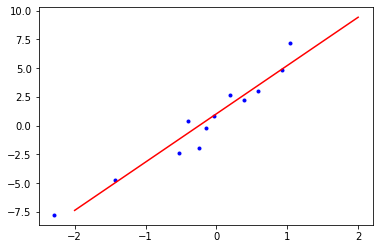

In [21]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,w*xlin+b,'r-')

### Dodatek - automatyczne obliczanie analitycznych gradientów w tensorflow

In [22]:
import tensorflow as tf

w = tf.Variable([1.0],"w")
b = tf.Variable(0.1,"b")
x_tf = tf.placeholder(tf.float32, shape=(None,1))
y_tf = tf.placeholder(tf.float32, shape=(None))


lin_model =  tf.tensordot(x_tf,w,axes=[1,0]) + b

loss = tf.reduce_mean( 0.5*(lin_model - y_tf)**2 )

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

dw, db = tf.gradients(ys=loss,xs=[w,b])

sess.run([dw,db,loss],feed_dict={x_tf:x[:,np.newaxis],y_tf:y})

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[array([-2.597154], dtype=float32), -0.40247005, 4.843229]

In [23]:
sess.run(loss,feed_dict={x_tf:x[:,np.newaxis],y_tf:y})

4.843229